## Clean Technologies 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
categories = pd.read_csv('../data/categories.csv', sep='\t')

In [5]:
categories.columns = ['sector','group','technology']

In [6]:
categories.head()

,sector,group,technology
0,Energy,Solar energy sources,solar PV
1,Energy,Solar energy sources,concentrated solar power (CSP)
2,Energy,Solar energy sources,solar heating
3,Energy,Solar energy sources,solar dryer
4,Energy,Solar energy sources,solar water pump


In [16]:
cordish2020 = pd.read_excel('../data/cordis-h2020projects.xlsx')

In [17]:
cordish2020['startDate'] = cordish2020['startDate'].map(pd.Timestamp)
cordish2020['endDate'] = cordish2020['endDate'].map(pd.Timestamp)

In [18]:
cordish2020.head()

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,...,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects
0,196618,643555,UNCAP,CLOSED,H2020-EU.3.1.6.,PHC-20-2014,H2020,Ubiquitous iNteroperable Care for Ageing People,2015-01-01,2017-12-31,...,The lack of ICT platforms based on open standa...,3820763.91,3086254.00,H2020-PHC-2014-single-stage,/IA,TRILOGIS SRL,IT,CREATE-NET (CENTER FOR RESEARCH AND TELECOMMUN...,IT;RO;DE;SE;EL;ES;MK;UK;SI,NaN
1,220199,822166,Governance,SIGNED,H2020-EU.3.6.3.;H2020-EU.3.6.1.,GOVERNANCE-14-2018,H2020,Democratic governance in a turbulent age,2018-12-01,2023-11-30,...,Democratic politics and governance in Europe a...,9090927.00,3000000.00,H2020-SC6-GOVERNANCE-2018,/ERA-NET-Cofund,NEDERLANDSE ORGANISATIE VOOR WETENSCHAPPELIJK ...,NL,STYRELSEN FOR FORSKNING OG UDDANNELSE;FONDS ZU...,DK;AT;EE;IS;LT;DE;SE;SI;CZ;ES;FI;PL;UK;NO;CH;I...,NaN
2,220196,822189,BRaVE,SIGNED,H2020-EU.3.6.1.2.,SU-GOVERNANCE-11-2018,H2020,Building Resilience Against Violent Extremism ...,2019-01-01,2021-06-30,...,Far Right and Islamist groups seeking to recru...,1483750.00,1483750.00,H2020-SC6-GOVERNANCE-2018,/CSA,EUROPEAN UNIVERSITY INSTITUTE,IT,DUBLIN CITY UNIVERSITY;KOZEP-EUROPAI EGYETEM;C...,IE;HU;BE;UK;PL;DE,NaN
3,216332,801338,VES4US,SIGNED,H2020-EU.1.2.1.,FETOPEN-01-2016-2017,H2020,Extracellular vesicles from a natural source f...,2018-09-01,2021-08-31,...,"Extracellular vesicles (EVs) are cell-derived,...",2946303.75,2946303.75,H2020-FETOPEN-1-2016-2017,/RIA,CONSIGLIO NAZIONALE DELLE RICERCHE,IT,"ZABALA INNOVATION CONSULTING, S.A.;INSTITUTE O...",ES;IE;CH;DE;SI,NaN
4,216023,770045,DIALLS,SIGNED,H2020-EU.3.6.3.2.,CULT-COOP-03-2017,H2020,DIalogue and Argumentation for cultural Litera...,2018-05-01,2021-04-30,...,DIALLS is a three year project with three obje...,4373308.75,4373308.75,H2020-SC6-CULT-COOP-2017-two-stage,/RIA,THE CHANCELLOR MASTERS AND SCHOLARS OF THE UNI...,UK,EDEX - EDUCATIONAL EXCELLENCE CORPORATION LIMI...,CY;FI;PT;LT;ES;IL;DE;FR,NaN


Objective example

---

In [8]:
cordish2020.loc[13]['objective']

'Slag is a by-product of metal smelting, and ~3.5 million tpa are produced globally in refining Non Ferrous Metals (NFM) and making alloys. Slag contains impurities and forms a protective crust of non-metallic & metallic oxides, and contains significant ‘free’ & alloyed metal (from 10 to 70% by weight). While slag can be used as aggregate, there are increasing concerns over ‘leaching’ of heavy metals into water courses from using these materials in civil engineering. While some metal can be recovered by re-melting slag (at very high temp), this is extremely expensive with very high energy burden which often makes recovery un-economic, but necessary. Landfill of slag is increasingly not an option. Our idea is to use a relatively new technology called ‘implosion’ to selectively break down and separate non-metallic components of slag from metallic particles. This will be combined with ultrasonic vibration sieving for accelerated recovery of metal from the finest fraction. This novel techn

---

#### Flashtext for easy regex

In [11]:
from flashtext import KeywordProcessor

In [12]:
def extract(vec, dictionary, info=False):
    empty = []
    for line in vec:
        empty.append(dictionary.extract_keywords(line, span_info=info))
    return empty

In [13]:
for column in categories.columns:
    dictionary = KeywordProcessor()
    dictionary.add_keywords_from_list(list(categories[str(column)]))
    extracted = extract(cordish2020['objective'], dictionary)
    #cordish2020['matches_'+str(column)] = extracted
    cordish2020['matches_'+str(column)] = [list(set(i)) if len(i)>0 else '' for i in extracted]
    cordish2020['count_matches_'+str(column)] = [len(i) for i in extracted]
    cordish2020['count_unique_matches_'+str(column)] = [len(set(i)) for i in extracted]

Example

---

In [14]:
dictionary0 = KeywordProcessor()
dictionary0.add_keywords_from_list(list(categories['sector']))

In [15]:
extract(cordish2020['objective'], dictionary0, info=True)[:20]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [('Industry', 1099, 1107)],
 [],
 [],
 [],
 [('Energy', 153, 159),
  ('Energy', 383, 389),
  ('Energy', 438, 444),
  ('Energy', 566, 572),
  ('Energy', 754, 760),
  ('Energy', 1597, 1603),
  ('Energy', 1837, 1843)],
 [],
 [('Energy', 588, 594), ('Energy', 1558, 1564), ('Energy', 1696, 1702)],
 [('Industry', 1013, 1021), ('Industry', 1618, 1626)],
 [('Energy', 77, 83),
  ('Energy', 213, 219),
  ('Energy', 448, 454),
  ('Energy', 1002, 1008),
  ('Energy', 1179, 1185)],
 [],
 [],
 [],
 []]

---

In [16]:
cordish2020['count_matches'] = cordish2020['count_matches_sector'] + cordish2020['count_matches_group'] + cordish2020['count_matches_technology']

In [17]:
cordish2020matches = cordish2020[cordish2020['count_matches'] > 0 ]

In [18]:
print(len(cordish2020matches)/len(cordish2020))

0.3882076827282307


In [19]:
cordish2020matches.id[:20]

7     732665
9     700626
11    661431
13    651407
14    663655
15    663654
22    673048
23    663865
24    641003
28    664168
31    663704
32    663828
33    673373
36    662690
37    642085
38    634135
41    638661
51    660028
55    659025
56    656676
Name: id, dtype: int64

In [20]:
cordish2020matches.sort_values('count_matches', ascending=False).head(10)

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,...,matches_sector,count_matches_sector,count_unique_matches_sector,matches_group,count_matches_group,count_unique_matches_group,matches_technology,count_matches_technology,count_unique_matches_technology,count_matches
20293,194405,645963,SENSIBLE,SIGNED,H2020-EU.3.3.,LCE-08-2014,H2020,Storage-Enabled Sustainable Energy for Buildin...,2015-01-01,2018-06-30,...,"[Energy, Buildings]",20,2,"[Storage, Energy management]",13,2,"[thermal storage, energy storage, heat pumps]",4,3,37
14652,210955,739615,acteno,SIGNED,H2020-EU.2.3.2.2.,INNOSUP-02-2016,H2020,Industrial Energy Storage Integration - develo...,2017-09-01,2018-08-31,...,"[Industry, Energy]",12,2,[Storage],14,1,[energy storage],4,1,30
1922,218681,824066,E-MAGIC,SIGNED,H2020-EU.1.2.2.,FETPROACT-01-2018,H2020,European Magnesium Interactive Battery Community,2019-01-01,2022-12-31,...,"[Energy, Buildings, Transport]",19,3,[Storage],6,1,[energy storage],5,1,30
18909,200258,691799,UPWAVE,TERMINATED,H2020-EU.3.3.;H2020-EU.3.;H2020-EU.3.3.2.4.;H2...,LCE-03-2015,H2020,Demonstration of a 1-MW wave energy converter ...,2016-02-01,2021-01-31,...,"[Industry, Energy]",11,2,[Wind],8,1,"[offshore wind, wave energy]",9,2,28
13310,213876,808585,gridBox,SIGNED,H2020-EU.3.3.;H2020-EU.2.1.1.;H2020-EU.2.3.1.,SMEInst-09-2016-2017,H2020,A smart energy management system for energy tr...,2018-01-01,2018-04-30,...,[Energy],21,1,"[Storage, Energy management]",4,2,[energy storage],2,1,27
166,217589,816706,EOLI FPS,SIGNED,H2020-EU.3.;H2020-EU.2.3.;H2020-EU.2.1.,EIC-SMEInst-2018-2020,H2020,Roof top wind turbine for urban areas,2018-05-01,2018-08-31,...,"[Energy, Buildings]",13,2,"[Storage, Wind]",13,2,[energy storage],1,1,27
8629,197010,673782,FLOATMAST,SIGNED,H2020-EU.3.3.;H2020-EU.2.3.1.,SIE-01-2014-1,H2020,An Innovative Wind Resource Assessment Tension...,2015-06-01,2015-11-30,...,[Industry],2,1,[Wind],15,1,"[offshore wind, onshore wind]",9,2,26
19438,198559,698136,WITRO,SIGNED,H2020-EU.3.3.;H2020-EU.2.3.1.,SIE-01-2015-1,H2020,Wind and Turbulence Radar for Offshore wind en...,2015-09-01,2015-12-31,...,[Energy],4,1,[Wind],21,1,[offshore wind],1,1,26
6375,199618,691761,CryoHub,SIGNED,H2020-EU.3.3.,LCE-09-2015,H2020,Developing Cryogenic Energy Storage at Refrige...,2016-04-01,2019-09-30,...,[Energy],12,1,[Storage],7,1,[energy storage],5,1,24
4644,205917,727477,CL-Windcon,SIGNED,H2020-EU.3.3.2.,LCE-07-2016-2017,H2020,Closed Loop Wind Farm Control,2016-11-01,2019-10-31,...,[Energy],1,1,[Wind],22,1,,0,0,23


There is one hypthesis here:  
The more count matches you have the better the accuracy to detect technology terms in the objective text  
Might be solved with statistical sampling. For each count match, select a sample check manually the accuracy  
http://www.marknagelberg.com/using-python-to-figure-out-sample-sizes-for-your-study/

EDA
1. Group by month and count over the time
2. Group by month and sum the total cost over the time
3. Group by country coordinator and count

In [21]:
dfy = cordish2020matches.groupby(cordish2020matches['startDate'].map(lambda x: x.year)).count()['id']

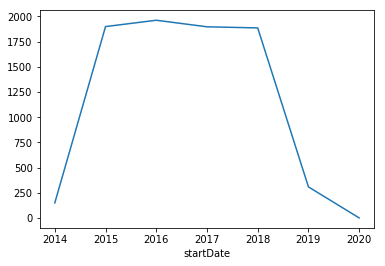

In [22]:
dfy.plot()

In [23]:
dfc = cordish2020matches.groupby(cordish2020matches['startDate'].map(lambda x: x.year)).sum()['totalCost']

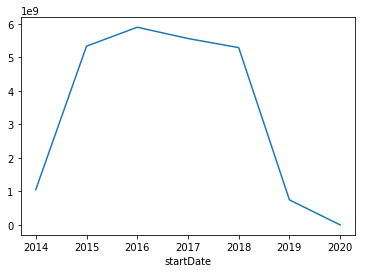

In [24]:
dfc.plot()

In [25]:
df_c = cordish2020matches.groupby(['coordinator','coordinatorCountry']).count()['id'].sort_values(ascending=False).reset_index()
df_c.columns = ['coordinator','coordinatorCountry','count']

In [26]:
df_c.head(20)

,coordinator,coordinatorCountry,count
0,CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS,FR,154
1,THE CHANCELLOR MASTERS AND SCHOLARS OF THE UNI...,UK,75
2,COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERG...,FR,67
3,"THE CHANCELLOR, MASTERS AND SCHOLARS OF THE UN...",UK,61
4,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,DE,58
5,FRAUNHOFER GESELLSCHAFT ZUR FOERDERUNG DER ANG...,DE,55
6,IMPERIAL COLLEGE OF SCIENCE TECHNOLOGY AND MED...,UK,53
7,TECHNISCHE UNIVERSITEIT DELFT,NL,53
8,ECOLE POLYTECHNIQUE FEDERALE DE LAUSANNE,CH,49
9,KATHOLIEKE UNIVERSITEIT LEUVEN,BE,44


In [27]:
cordish2020matches.columns

Index(['rcn', 'id', 'acronym', 'status', 'programme', 'topics',
       'frameworkProgramme', 'title', 'startDate', 'endDate', 'projectUrl',
       'objective', 'totalCost', 'ecMaxContribution', 'call', 'fundingScheme',
       'coordinator', 'coordinatorCountry', 'participants',
       'participantCountries', 'subjects', 'matches_sector',
       'count_matches_sector', 'count_unique_matches_sector', 'matches_group',
       'count_matches_group', 'count_unique_matches_group',
       'matches_technology', 'count_matches_technology',
       'count_unique_matches_technology', 'count_matches'],
      dtype='object')

In [28]:
def get_terms_matrix(vector_of_terms, all_terms):
    matrix = []
    for vector in vector_of_terms:
        ind_vector = [0] * len(all_terms)
        for v in vector:
            for idx, i in enumerate(all_terms):
                if v == i:
                    ind_vector[idx] = 1
        matrix.append(ind_vector)
    table = pd.DataFrame(matrix)
    return table

In [29]:
all_terms = [i for i in set([*list(categories['sector']), *list(categories['group']), *list(categories['technology'])])]

In [30]:
all_terms[:10]

['Human settlements',
 'low GHG coolant/refrigerant',
 'pulp and paper drying',
 'distributed manufacturing',
 'Nuclear energy sources',
 'cool roof',
 'low GHG cement',
 'conservation tillage',
 'biopolymer',
 'low GHG transmission']

In [31]:
matches_technology_table = get_terms_matrix(list(cordish2020matches['matches_technology']), all_terms)
matches_group_table = get_terms_matrix(list(cordish2020matches['matches_group']), all_terms)
matches_sector_table = get_terms_matrix(list(cordish2020matches['matches_sector']), all_terms)

In [32]:
matches_table = matches_sector_table + matches_group_table + matches_technology_table

In [33]:
matches_table.columns = all_terms

In [34]:
matches_table['count'] = matches_table.sum(axis=1)

In [35]:
matches_table.head()

,Human settlements,low GHG coolant/refrigerant,pulp and paper drying,distributed manufacturing,Nuclear energy sources,cool roof,low GHG cement,conservation tillage,biopolymer,low GHG transmission,...,bioplastics,liquefied natural gas (LNG),waste heat reuse,regenerative braking,low GHG public transport / rapid transit design,tidal energy,Decreased energy consumption design or practices,solar heating,Building management,count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
len(matches_table)

8105

In [37]:
full_table_tech_matches = pd.concat([cordish2020matches.reset_index(), matches_table], axis=1).sort_values(['count_matches','count'], ascending=False).reset_index()

In [38]:
len(full_table_tech_matches)

8105

In [39]:
full_table_tech_matches[['id','acronym','title','objective','count','count_matches']].head(30)

,id,acronym,title,objective,count,count_matches
0,645963,SENSIBLE,Storage-Enabled Sustainable Energy for Buildin...,The project SENSIBLE addresses the call LCE-08...,7,37
1,824066,E-MAGIC,European Magnesium Interactive Battery Community,Energy storage is a key technology to facilita...,5,30
2,739615,acteno,Industrial Energy Storage Integration - develo...,We see industrial grade storage solutions as t...,4,30
3,691799,UPWAVE,Demonstration of a 1-MW wave energy converter ...,The aim is to develop and install a pre-commer...,5,28
4,816706,EOLI FPS,Roof top wind turbine for urban areas,High electricity prices and the lowering costs...,5,27
5,808585,gridBox,A smart energy management system for energy tr...,Imbalances in the energy generation and demand...,4,27
6,673782,FLOATMAST,An Innovative Wind Resource Assessment Tension...,The proposal is about the development of an in...,4,26
7,698136,WITRO,Wind and Turbulence Radar for Offshore wind en...,The project studies the use of a radar based t...,3,26
8,691761,CryoHub,Developing Cryogenic Energy Storage at Refrige...,The CryoHub innovation project will investigat...,3,24
9,726776,VORTEX,NEW CONCEPT OF AFFORDABLE WIND ENERGY GENERATO...,We have developed a resource-efficient and aff...,3,23


In [40]:
termsT = full_table_tech_matches.iloc[:,33:-1].T
termsT['sum'] = termsT.sum(axis=1)

In [41]:
termsT.sort_values('sum', ascending=False)

,0,1,2,3,4,5,6,7,8,9,...,8096,8097,8098,8099,8100,8101,8102,8103,8104,sum
Energy,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,3542
Industry,0,0,1,1,0,0,1,0,0,1,...,0,1,1,0,0,1,1,1,1,3514
Transport,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1218
Storage,1,1,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,784
Fuel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,686
Agriculture,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,423
Buildings,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,421
Wind,0,0,0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,344
recycling,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,251
energy storage,1,1,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,194


In [42]:
len(termsT[termsT['sum']>0])/len(termsT)

0.5514705882352942

#### Syntactic probabilistic classification using spacy and fuzzywuzzy

In [21]:
import spacy
import numpy as np
from spacy import displacy
from collections import Counter
import en_core_web_sm
from fuzzywuzzy import process, fuzz
import re
nlp = en_core_web_sm.load()
import textdistance as tx
import unicodedata
from textdistance.algorithms import vector_based

In [22]:
def clean(string):
    return re.sub(r'[-\s]+', '-',
                str(
                    re.sub(r'[^\w\s-]', '',
                        unicodedata.normalize('NFKD', string)
                    .strip()
                   )))

In [23]:
cordish2020.loc[13]['objective']

'Slag is a by-product of metal smelting, and ~3.5 million tpa are produced globally in refining Non Ferrous Metals (NFM) and making alloys. Slag contains impurities and forms a protective crust of non-metallic & metallic oxides, and contains significant ‘free’ & alloyed metal (from 10 to 70% by weight). While slag can be used as aggregate, there are increasing concerns over ‘leaching’ of heavy metals into water courses from using these materials in civil engineering. While some metal can be recovered by re-melting slag (at very high temp), this is extremely expensive with very high energy burden which often makes recovery un-economic, but necessary. Landfill of slag is increasingly not an option. Our idea is to use a relatively new technology called ‘implosion’ to selectively break down and separate non-metallic components of slag from metallic particles. This will be combined with ultrasonic vibration sieving for accelerated recovery of metal from the finest fraction. This novel techn

In [24]:
text = cordish2020['objective'][13]
doc = nlp(text)
docs = list(map(str, doc.noun_chunks))
docs

['Slag',
 'a by-product',
 'metal smelting',
 'million tpa',
 'Non Ferrous Metals',
 'NFM',
 'alloys',
 'Slag',
 'impurities',
 'a protective crust',
 'non-metallic & metallic oxides',
 'alloyed metal',
 '10 to 70%',
 'weight',
 'slag',
 'concerns',
 'heavy metals',
 'water courses',
 'these materials',
 'civil engineering',
 'some metal',
 're-melting slag',
 'very high temp',
 'very high energy burden',
 'recovery',
 'Landfill',
 'slag',
 'an option',
 'Our idea',
 'a relatively new technology',
 'slag',
 'metallic particles',
 'accelerated recovery',
 'metal',
 'the finest fraction',
 'This novel technology',
 'waste glass',
 'it',
 'uniform size',
 'normal crushing techniques',
 'This technology',
 'other materials',
 'Benefits',
 'partners',
 'endusers',
 'society',
 'Rapid recovery',
 'more metal',
 'slag',
 'relatively low cost',
 'Strategic control',
 'metal',
 'control thro',
 '’ export',
 '‘low cost’ economies',
 'Enable smelters',
 'house',
 '‘recycle-miles’',
 'energy',
 't

**Get all the synonyms from the short descriptions**

In [25]:
categories2 = pd.read_excel('../data/categories.xlsx')
categories2 = categories2.fillna(method='ffill')
categories2.head()

,IPCC sectoral category,Technology group,Technology,Short description,Source
0,Energy,Solar energy sources,solar PV,Also “solar photovoltaic”; technology of using...,https://www.ctc-n.org/technologies/solar-pv
1,Energy,Solar energy sources,concentrated solar power (CSP),Technology of producing electricity by concent...,https://setis.ec.europa.eu/technologies/concen...
2,Energy,Solar energy sources,solar heating,Technology of capturing the sun's radiation an...,https://www.ctc-n.org/technologies/solar-heating
3,Energy,Solar energy sources,solar dryer,"Technology of drying substances, especially fo...",https://www.ctc-n.org/technologies/solar-dryer
4,Energy,Solar energy sources,solar water pump,Technology of powering electrical water pumps ...,https://www.ctc-n.org/technologies/solar-water...


In [32]:
technologies = re.findall('“([^“]*)”', " ".join(categories2['Short description']))
technologies

['solar photovoltaic',
 'osmotic power',
 'salinity gradient power',
 'blue energy',
 'downdraft',
 'energy tower',
 'solar tower',
 'smart grid',
 'nuclear power',
 'low carbon house/building',
 'zero emissions house/building',
 'distributed production',
 'cloud producing',
 'local manufacturing',
 'CCS',
 'carbon sequestration',
 'combustion turbine',
 'waste-to-energy',
 'thermal gasification of municipal solid waste',
 'agro-sylviculture',
 'reforestation']

In [27]:
technologies.extend(categories2['Technology'])
#technologies.extend(['carbon emmisions', 'new technology'])

In [28]:
technologies = list(set(technologies))

In [1]:
#technologies = [clean(str(txt)) for txt in technologies]
technologies

NameError: name 'technologies' is not defined

In [ ]:
def find_best_matching_tech(techs, doc):
    best_matches = []
    best1 = [("", 0)]
    best2 = [("", 0)]
    val2=""
    best_tech = []
    for val in techs:
        best_curs = process.extract(val, doc, limit=1, scorer=fuzz.ratio)
        terms = ""
        for cat in best_curs:
            terms = terms + cat[0] + "," 
        terms = terms[:-1]
        if len(best_curs)==0:
            avg = 0
        else:
            avg = sum(i for _, i in best_curs)/float(len(best_curs))
        best_cur = [(terms, avg)]
        best_matches.extend(best_cur)
        if best_cur[0][1] > best1[0][1]:
            best1 = best_cur
            best_tech = [val]
        elif best_cur[0][1] == best1[0][1]:
            best1.extend(best_cur)
            best_tech.append(val)
        else:
            if best_cur[0][1] > best2[0][1] and len(best1)<3:
                best2 = best_cur
                val2 = val
    if len(best1)<3:            
        best1.extend(best2)
        best_tech.append(val2)
    return best_matches, best_tech, best1

In [34]:
cordish2020['category'] = pd.Series(np.random.randn(len(cordish2020)), index=cordish2020.index)
for idx in range(len(cordish2020['objective'])):
    text = cordish2020['objective'][idx]
    doc = nlp(text)
   # doc = " ".join([token.lemma_ for token in doc])
    #doc = nlp(doc)
    docs = list(map(str, doc.noun_chunks))
    #docs = [clean(str(txt)) for txt in docs]
    _, best_tech, best_match = find_best_matching_tech(technologies, docs)
    #print(best_tech, best_match)
    if round(best_match[0][1]) > 64:
        cordish2020['category'][idx] = " ".join(best_tech)
    else:
        cordish2020['category'][idx] = 'None'


/Users/pedrohserrano/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/pedrohserrano/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/pedrohserrano/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == ''

RuntimeError: generator raised StopIteration

In [25]:
cordish2020['category'].value_counts()['None']

19063

In [26]:
cordish2020matches2 = cordish2020[cordish2020['category'] != "None" ]

In [27]:
print(len(cordish2020matches2)/len(cordish2020))

0.08693361433087461


In [28]:
cordish2020matches2.id[:20]

4      770045
11     661431
13     651407
26     666100
32     663828
43     666427
46     633317
48     822622
56     656676
66     656810
84     832150
87     832171
130    832148
137    804519
142    814408
146    826051
159    831041
160    817788
166    816706
168    816636
Name: id, dtype: int64

In [29]:
cordish2020matches2.head(20)

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,...,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects,category
4,216023,770045,DIALLS,SIGNED,H2020-EU.3.6.3.2.,CULT-COOP-03-2017,H2020,DIalogue and Argumentation for cultural Litera...,2018-05-01,2021-04-30,...,4373308.75,4373308.75,H2020-SC6-CULT-COOP-2017-two-stage,/RIA,THE CHANCELLOR MASTERS AND SCHOLARS OF THE UNI...,UK,EDEX - EDUCATIONAL EXCELLENCE CORPORATION LIMI...,CY;FI;PT;LT;ES;IL;DE;FR,NaN,methane reduction afforestation
11,196096,661431,RE-DEV,CLOSED,H2020-EU.1.3.2.,MSCA-IF-2014-EF,H2020,Assessing the transition to renewable energy i...,2015-11-06,2017-11-05,...,158121.60,158121.60,H2020-MSCA-IF-2014,/MSCA-IF-EF-ST,Centre for International Information and Docum...,ES,NaN,NaN,NaN,wave energy blue energy low GHG transmission
13,196637,651407,Ultroslag,CLOSED,H2020-EU.3.5.;H2020-EU.2.3.1.,SC5-20-2014-1,H2020,A new integrated sustainable processing system...,2014-10-01,2015-03-31,...,71429.00,50000.00,H2020-SMEINST-1-2014,/SME-1,ULTROMEX LTD,UK,NaN,NaN,NaN,recycling methane reduction
26,196378,666100,EVIDENT,SIGNED,H2020-EU.3.1.,Health,H2020,Ebola Virus Disease - correlates of protection...,2014-11-01,2016-10-31,...,1759325.25,1759325.25,H2020-Adhoc-2014-20,/RIA,BERNHARD-NOCHT-INSTITUT FUER TROPENMEDIZIN,DE,PHILIPPS UNIVERSITAET MARBURG;INSTITUT NATIONA...,DE;FR;UK;NL;IT;HU;SI,NaN,reforestation nutrient management
32,196286,663828,AQUASONIC-diesel,CLOSED,H2020-EU.3.4.;H2020-EU.2.3.1.,IT-1-2014-1,H2020,UPSCALE OF ELECTRICAL PULSES TECHNOLOGY CAPABL...,2015-02-01,2015-06-30,...,71429.00,50000.00,H2020-SMEINST-1-2014,/SME-1,AQUASONIC SL,ES,NaN,NaN,NaN,biofuel combustion turbine
43,196657,666427,ADD-ON,SIGNED,H2020-EU.3.5.;H2020-EU.2.3.1.,SC5-20-2014,H2020,A demonstration plant of enhanced biogas produ...,2015-03-01,2019-02-28,...,2021077.50,1414754.25,H2020-SMEINST-2-2014,/SME-2,DUCTOR OY,FI,NaN,NaN,NaN,cloud producing methane reduction
46,196602,633317,FUSION NIGHT,CLOSED,H2020-EU.1.3.5.,MSCA-NIGHT-2014,H2020,Find Your Passion for Science on Researchers N...,2014-06-01,2015-11-30,...,81000.00,81000.00,H2020-MSCA-NIGHT-2014,/CSA,Instytut Rozrodu Zwierzat i Badan Zywnosci Pol...,PL,OLSZTYNSKA SZKOLA WYZSZA IM. JOZEFA RUSIECKIEGO,PL,NaN,smelt reduction methane reduction
48,220198,822622,EU IDEA,SIGNED,H2020-EU.3.6.1.2.,GOVERNANCE-02-2018-2019,H2020,EU Integration and Differentiation for Effecti...,2019-01-01,2021-12-31,...,2991471.25,2991471.25,H2020-SC6-GOVERNANCE-2018,/RIA,ISTITUTO AFFARI INTERNAZIONALI,IT,EGMONT - INSTITUT ROYAL DES RELATIONS INTERNAT...,BE;MK;IT;CH;TR;DE;UK;NO;FR;FI;NL;ES;CZ,NaN,afforestation reforestation
56,195297,656676,FEAT,CLOSED,H2020-EU.1.3.2.,MSCA-IF-2014-EF,H2020,The role of Fluid pressure in EArthquake Trigg...,2015-12-01,2017-11-30,...,180277.20,180277.20,H2020-MSCA-IF-2014,/MSCA-IF-EF-ST,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,IT,NaN,NaN,NaN,methane reduction innovative construction
66,195328,656810,DENDRONUTRIENT,CLOSED,H2020-EU.1.3.2.,MSCA-IF-2014-EF,H2020,Disentangling the effects of CO2 fertilization...,2016-03-01,2018-02-28,...,170121.60,170121.60,H2020-MSCA-IF-2014,/MSCA-IF-EF-ST,UNIVERSIDAD PUBLICA DE NAVARRA,ES,NaN,NaN,NaN,forest management straw management


In [31]:
text = cordish2020['objective'][13]
doc = nlp(text)
#doc = " ".join([token.lemma_ for token in doc])
#doc = nlp(doc)
docs = list(map(str, doc.noun_chunks))
_, best_tech, best_match = find_best_matching_tech(technologies, docs)
print(best_tech,best_match)

['soil management', 'reuse of material'] [('Slag,Slag,slag,slag,slag', 0.7555555555555555), ('these materials,other materials,Non Ferrous Metals,more metal,The ultimate goal', 0.7344169991228815)]
